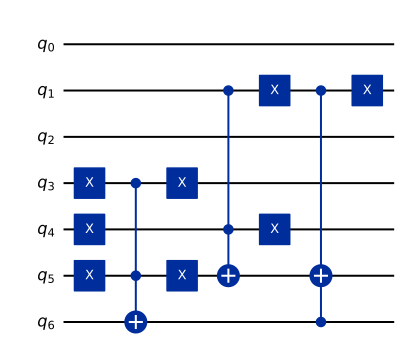

In [3]:
import numpy as np
from qiskit import QuantumCircuit

# 1. 设定 Logistic 变换参数
r = 3.9         # Logistic 混沌参数
x0 = 0.324567   # 初始值 (密钥)
num_qubits = 7  # 量子比特数
num_gates = 5   # 生成 5 个 CCX 门

# 2. 生成 Logistic 变换序列
logistic_seq = []
x = x0
for _ in range(num_gates * 4):  # 需要 4 倍数量的随机数
    x = r * x * (1 - x)
    logistic_seq.append(x)

# 3. 映射到量子比特索引 (0~6)
index_seq = [int(x * num_qubits) for x in logistic_seq]
control_conditions = [int(x * 4) for x in logistic_seq]  # 生成 0, 1, 2, 3 (00, 01, 10, 11)

# 4. 生成量子电路
qc = QuantumCircuit(num_qubits)

for i in range(0, num_gates * 4, 4):
    c1, c2, t = index_seq[i:i+3]
    condition = control_conditions[i+3] % 4  # 确保控制条件在 0~3 之间

    if len(set([c1, c2, t])) == 3:  # 避免重复
        if condition == 0:  # 00 触发
            qc.x(c1)
            qc.x(c2)
            qc.ccx(c1, c2, t)
            qc.x(c1)
            qc.x(c2)
        elif condition == 1:  # 01 触发
            qc.x(c1)
            qc.ccx(c1, c2, t)
            qc.x(c1)
        elif condition == 2:  # 10 触发
            qc.x(c2)
            qc.ccx(c1, c2, t)
            qc.x(c2)
        elif condition == 3:  # 11 触发 (标准 CCX)
            qc.ccx(c1, c2, t)

# 5. 绘制电路
qc.draw('mpl')
